In [45]:
%load_ext autoreload
%autoreload 2

from scipy.optimize import curve_fit
import matplotlib.pyplot as plt 

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np

LOG.propagate = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
LOG.debug("debug")
LOG.info("info")
LOG.warning("warning")
LOG.error("error")
LOG.critical("critical")

2025-05-05 23:10:30,190 | INFO     |: info
2025-05-05 23:10:30,191 | WARNING  |: warning
2025-05-05 23:10:30,192 | ERROR    |: error
2025-05-05 23:10:30,193 | CRITICAL |: critical


In [77]:
# Get ArtemisBLEController object
ble = get_ble_controller()


# Connect to the Artemis Device
ble.connect()

2025-05-06 11:08:08,591 | INFO     |: Already connected to a BLE device


In [7]:
ble.send_command(CMD.PING, "")

In [8]:
s = ble.receive_string(ble.uuid['RX_STRING'])
print(s)

BleakError: Failed to read characteristic 14: Error Domain=CBATTErrorDomain Code=7 "The offset is invalid." UserInfo={NSLocalizedDescription=The offset is invalid.}

2025-05-05 23:06:01,124 | INFO     |: Disconnected from B9E76412-E4C0-18B7-0B21-A6BEFE645FB5


In [103]:
ble.send_command(CMD.GET_TOF_DATA, "")

<h4>Stunt code</h4>

In [25]:
data = ""
timeArr_for = []
tof_pid_for = [] 
timeArr_back = []
tof_pid_back = [] 

def notification_handler_stunt(uuid, array): 
    global timeArr
    global tof_pid

    s = ble.bytearray_to_string(array)
    data = s
    if "*" in data: 
        arr = s.split("*")
        timeArr_for.append(float(arr[0]))
        tof_pid_for.append(float(arr[1]))
        timeArr_back.append(float(arr[2]))
        tof_pid_back.append(float(arr[3]))
        

In [79]:
# ble.start_notify(ble.uuid['RX_STRING'], notification_handler_stunt)
ble.send_command(CMD.STUNT, "")

2025-05-06 11:09:04,857 | INFO     |: Disconnected from B9E76412-E4C0-18B7-0B21-A6BEFE645FB5


In [80]:
print(len(timeArr_for))

0


In [76]:
ble.stop_notify(ble.uuid['RX_STRING'])

ValueError: Characteristic notification never started

In [126]:
# ble.send_command(CMD.STOP_CAR,"")

In [127]:
print(tof_pid_for[:])

[2075.0, 2071.0, 2075.0, 2071.0, 2074.0, 2077.0, 2073.0, 2074.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

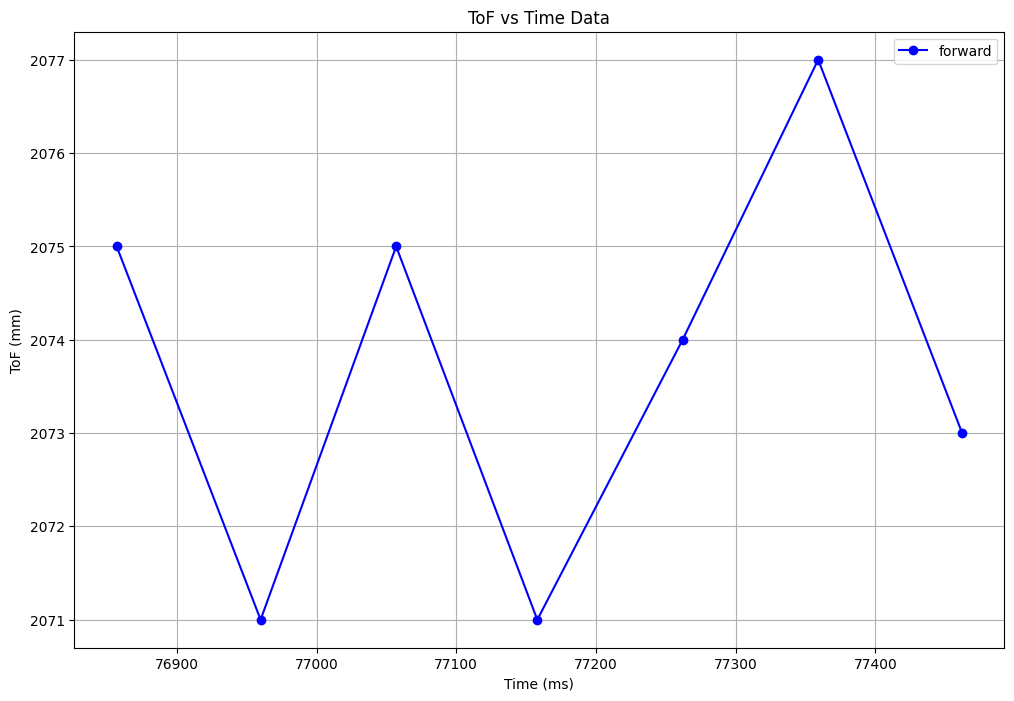

2025-04-11 23:29:21,599 | INFO     |: Disconnected from B9E76412-E4C0-18B7-0B21-A6BEFE645FB5


In [128]:
time_for = timeArr_for[:7]
tof_for = tof_pid_for[:7]

plt.figure(figsize=(12, 8))
plt.plot(time_for, tof_for, color='blue', label="forward", marker='o')
# plt.plot(time, tof, color='purple', label="backwards", marker='o') 

# Labels and title
plt.xlabel("Time (ms)")
plt.ylabel("ToF (mm)")

plt.title("ToF vs Time Data")
plt.legend()
plt.grid(True)
plt.show()

<h4>Kalman Filter on Robot</h4>

In [ ]:
data = ""
timeArr = []
tof_pid = [] 
pwm_pid = [] 
kf_dist = [] 

def notification_handler_pid(uuid, array): 
    global timeArr
    global tof_pid
    global pwm_pid
    global kf_dist

    s = ble.bytearray_to_string(array)
    data = s
    if "*" in data: 
        arr = s.split("*")
        timeArr.append(float(arr[0]))
        tof_pid.append(float(arr[1]))
        pwm_pid.append(float(arr[2]))
        kf_dist.append(float(arr[3]))

In [ ]:
# ble.send_command(CMD.START_PID, "0.05|0.004|0")
ble.send_command(CMD.START_PID, "")

In [ ]:
ble.send_command(CMD.STOP_PID,"")

In [ ]:
ble.start_notify(ble.uuid['RX_STRING'], notification_handler_pid)
ble.send_command(CMD.SEND_PID_DATA,"")

In [ ]:
print(len(timeArr))
print(len(tof_pid))
print(len(kf_dist))

In [ ]:
ble.stop_notify(ble.uuid['RX_STRING'])

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(time, measured_distance, color='blue', label="ToF", marker='o')
plt.plot(time, kalman_distance, color='orange', label="KF Dist")

# Labels and title
plt.xlabel("Time (ms)")
plt.ylabel("Distance (mm)")

plt.title("Distance vs Time Data")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Time points (milliseconds)
time = [
    2442.419, 2442.469, 2442.519, 2442.569, 2442.619, 2442.669, 2442.719, 2442.769, 2442.819, 2442.869, 
    2442.919, 2442.969, 2443.019, 2443.069, 2443.119, 2443.169, 2443.219, 2443.269, 2443.319, 2443.369, 
    2443.419, 2443.469, 2443.519, 2443.569, 2443.619, 2443.669, 2443.719, 2443.769, 2443.819, 2443.869, 
    2443.919, 2443.969, 2444.019, 2444.069, 2444.119, 2444.169, 2444.219
]

# PWM values with oscillation from PID controller
pwm_values = [
    185, 182, 184, 180, 178, 175, 173, 170, 167, 164,
    160, 155, 150, 146, 140, 135, 129, 122, 115, 108,
    100, 92, 85, 77, 70, 62, 54, 47, 39, 32,
    25, 18, 10, 3, -5, -10, -6
]

plt.figure(figsize=(12, 8))
plt.plot(time, pwm_values, color='blue', label="PWM", marker='o')

# Labels and title
plt.xlabel("Time (ms)")
plt.ylabel("PWM")

plt.title("PWM vs Time Data")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
x_values = timeArr
y_values = tof_pid
kf_vals = kf_dist
pwm_vals = pwm_pid

plt.figure(figsize=(12, 8))
plt.scatter(x_values, pwm_pid, color='purple', label="ToF", marker="o")
plt.plot(x_values, kf_vals, color='orange', label="KF Dist")

# Labels and title
plt.xlabel("Time (s)")
plt.ylabel("Distance (mm)")

plt.title("Distance vs Time Data")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(tof_pid[:50])
print(kf_vals[:50])

<h3>Drag Estimation</h3>

In [ ]:
data = ""
timeArr = [] 
timeArr_s = [] 
tof_data = [] 
pwm_data = [] 

def notification_handler_pid(uuid, array): 
    global timeArr
    global tof_pid

    s = ble.bytearray_to_string(array)
    data = s
    if "*" in data: 
        arr = s.split("*")
        timeArr.append(float(arr[0]))
        timeArr_s.append(float(arr[0]) / 1000)
        tof_data.append(float(arr[1]))
        pwm_data.append(int(arr[2]))

In [ ]:
ble.send_command(CMD.CAR_FORWARDS, "")

In [ ]:
ble.send_command(CMD.STOP_CAR, "")

In [ ]:
ble.start_notify(ble.uuid['RX_STRING'], notification_handler_pid)
ble.send_command(CMD.GET_TOF_DATA, "")

In [ ]:
print(len(timeArr))

In [ ]:
print(len(tof_data))

In [ ]:
print(timeArr)

In [ ]:
print(tof_data)

In [ ]:
ble.stop_notify(ble.uuid['RX_STRING'])

In [ ]:
x_values = timeArr_s[10:]
y_values = tof_data[10:]
pwm_vals = pwm_data[10:]

plt.figure(figsize=(12, 8))
plt.plot(x_values, y_values, color='blue', marker='o', label="ToF" )
plt.plot(x_values, pwm_vals, color='orange', label="PWM")

# Labels and title
plt.xlabel("Time (s)")
plt.ylabel("ToF/PWM (mm)")

plt.title("Tof/PWM vs Time Data")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
kf_time = []
kf_distance = []
kf_velocity = []
kf_pwm = []

time_data = timeArr[10:]
distance_data = tof_data[10:]
pwm_data = pwm_data[10:]

for i in range(len(time_data)):
    if i == 0:
        kf_distance.append(float(distance_data[0]))
        kf_time.append(0)
    else:
        if (distance_data[i] != distance_data[i-1]):
            kf_distance.append(float(distance_data[i]))
            kf_time.append(float((time_data[i] - time_data[0])/1000))

for i in range(len(kf_time)):
    if i == 0:
        kf_velocity.append(0)
    else:
        dt = time_data[i] - time_data[i-1]
        dist = kf_distance[i-1] - kf_distance[i]
        if (dt != 0 and dist != 0):
            kf_velocity.append(float(dist / dt*1000))

In [ ]:
ninety = [2070] * len(kf_vel)

plt.figure(figsize=(12, 8))
plt.plot(kf_time, kf_vel, color='blue', marker='o', label="Velocity")
plt.plot(kf_time, ninety, color='orange', label="90% steady state")

# Labels and title
plt.xlabel("Time (s)")
plt.ylabel("Velocity (mm/s)")

plt.title("Velocity vs Time Data")
plt.legend()
plt.grid(True)
plt.grid(True)
plt.show()

In [ ]:
ninety = [2070] * 4

plt.figure(figsize=(12, 8))
plt.plot(kf_time[-4:], kf_vel[-4:], color='blue', marker='o', label="Velocity")
plt.plot(kf_time[-4:], ninety, color='orange', marker='o', label="90% Speed")
# Labels and title
plt.xlabel("Time (s)")
plt.ylabel("Velocity (mm/s)")

plt.title("Velocity vs Time Data")
plt.legend()
plt.grid(True)
plt.grid(True)
plt.show()

In [ ]:
avg = sum(kf_vel[4:]) / len(kf_vel[4:])
print(avg)

In [ ]:
print(len(kf_vel))

In [ ]:
print(len(timeArr))

In [ ]:
print(timeArr)

In [ ]:
print(tof_data)

In [ ]:
print(kf_vel)

In [ ]:
print(kf_time)

In [ ]:
print(kf_distance)

In [ ]:
import math

steady_state_vel = 2.300 # in m/s 
rise_time = 1.2 # in seconds
u = 1
d = u/steady_state_vel # kg 
m = (-d * rise_time) / math.log(0.1)
print(d)
print(m) 

# Kalman Filter

In [ ]:
A = np.array([[0,1],[0,-d/m]])
B = np.array([[0],[1/m]])
C = np.array([[1,0]])

In [ ]:
print(A)
print(B)

In [ ]:
# ToF Sampling Time = 0. 
n = 2
dt = 0.06

Ad = np.eye(n) + dt*A
Bd = dt * B 

In [ ]:
print(Ad)
print(Bd)

In [ ]:
x = np.array([[tof[0]], [0]])

In [ ]:
time = np.array(timeArr[10:28]) - timeArr[10]
tof = tof_data[10:28]
uss = 1

# x = np.array([[tof_data[0]], [0]])

In [ ]:
print(tof[0])

In [ ]:
sigma_1 = np.sqrt(100.0/dt) 
sigma_2 = sigma_1
sigma_3 = 10

In [ ]:
sigma_u = np.array([[sigma_1**2, 0], [0, sigma_2**2]]) # confidence in model
sigma_z = np.array([[sigma_3 ** 2]]) # confidence in measurements

In [ ]:
print(sigma_u)
print(sigma_z)

In [ ]:
def kf(mu,sigma,u,y):
    
    mu_p = A.dot(mu) + B.dot(u) 
    sigma_p = A.dot(sigma.dot(A.transpose())) + sigma_u
    
    sigma_m = C.dot(sigma_p.dot(C.transpose())) + sigma_z
    kkf_gain = sigma_p.dot(C.transpose().dot(np.linalg.inv(sigma_m)))

    y_m = y-C.dot(mu_p)
    mu = mu_p + kkf_gain.dot(y_m)    
    sigma=(np.eye(2)-kkf_gain.dot(C)).dot(sigma_p)

    return mu,sigma


In [ ]:
def kalman(mu, sigma, u, y, update = True):
    mu_p = Ad.dot(mu) + Bd.dot(u)
    sigma_p = Ad.dot(sigma.dot(Ad.transpose())) + sigma_u

    if not update:
        return mu_p, sigma_p

    sigma_m = C.dot(sigma_p.dot(C.transpose())) + sigma_z
    kkf_gain = sigma_p.dot(C.transpose().dot(np.linalg.inv(sigma_m)))

    y_m = y - C.dot(mu_p)
    mu = mu_p + kkf_gain.dot(y_m)
    sigma = (np.eye(2) - kkf_gain.dot(C)).dot(sigma_p)

    return mu, sigma
    

In [ ]:
# Uncertainty for initial state
sigma = np.array([[20**2, 0], [0, 10**2]])

kf = []

i = 0
for t in time:
    # Step through discrete time
    update = time[i+1] <= t
    i += 1 if update else 0

    # Run Kalman filter for each time step
    x, sigma = kalman(x, sigma, uss, tof[i], update)
    kf.append(x[0])

In [ ]:
print(len(kf))
print(len(kf_time))

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(kf_time, kf, color = "purple", label="KF Filter", marker="o")
plt.plot(kf_time, tof_data[10:], color = "blue", label="ToF Data", marker="o")

plt.title("KF Filter vs Time, sigma_3 = 10")
plt.xlabel("Time(s)")
plt.ylabel("Distance(mm)")
plt.legend()
plt.grid(True)
plt.show()

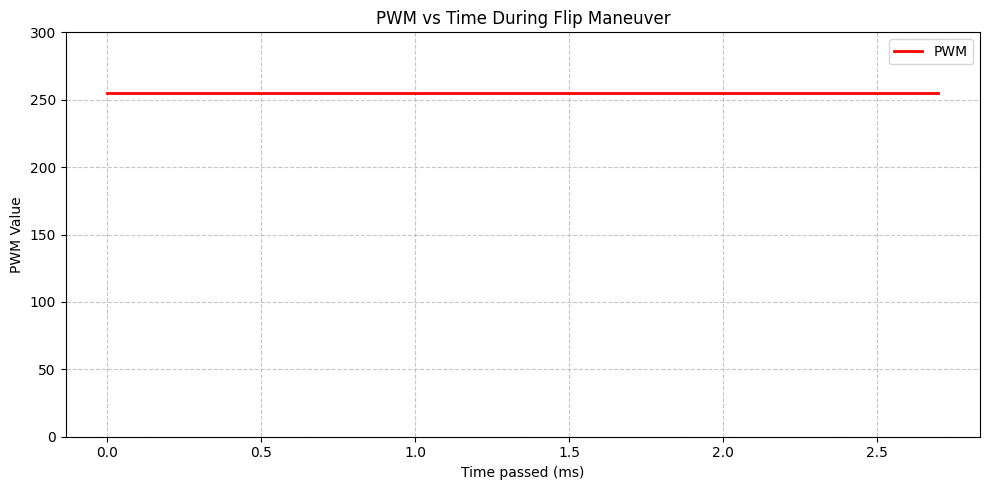

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Time interval: 0 to 2.7 ms (matching the ToF sensor graph)
time = np.linspace(0, 2.7, 200)  # 200 points for smooth curve

# Create constant PWM value of 255
pwm = np.ones_like(time) * 255

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(time, pwm, 'r-', linewidth=2)
plt.xlabel('Time passed (ms)')
plt.ylabel('PWM Value')
plt.title('PWM vs Time During Flip Maneuver')
plt.ylim(0, 300)  # Give some headroom above PWM value
plt.grid(True, linestyle='--', alpha=0.7)

# Add legend
plt.legend(['PWM'], loc='upper right')

plt.tight_layout()
plt.savefig('pwm_during_flip.png', dpi=300)
plt.show()

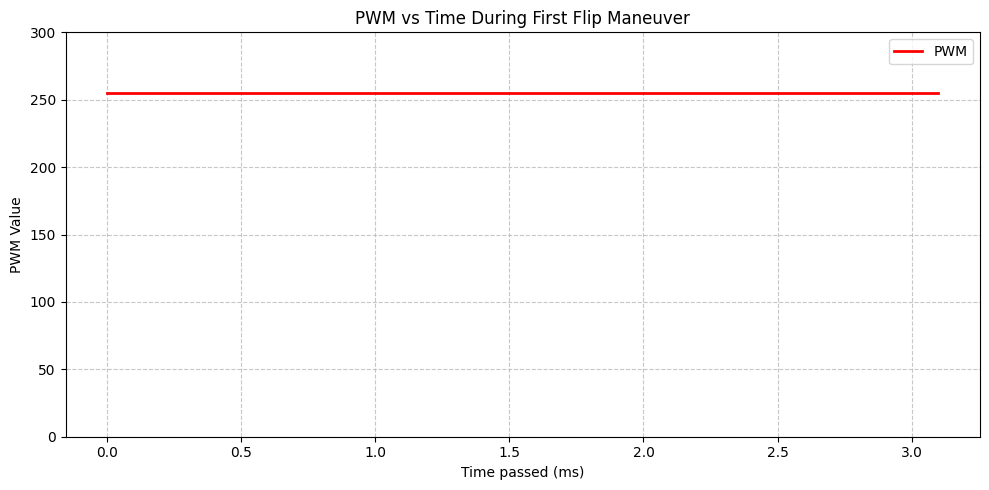

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Time interval: 0 to 3.1 ms (matching the first ToF sensor graph)
time = np.linspace(0, 3.1, 200)  # 200 points for smooth curve

# Create constant PWM value of 255
pwm = np.ones_like(time) * 255

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(time, pwm, 'r-', linewidth=2)
plt.xlabel('Time passed (ms)')
plt.ylabel('PWM Value')
plt.title('PWM vs Time During First Flip Maneuver')
plt.ylim(0, 300)  # Give some headroom above PWM value
plt.grid(True, linestyle='--', alpha=0.7)

# Add legend
plt.legend(['PWM'], loc='upper right')

plt.tight_layout()
plt.savefig('pwm_during_first_flip.png', dpi=300)
plt.show()

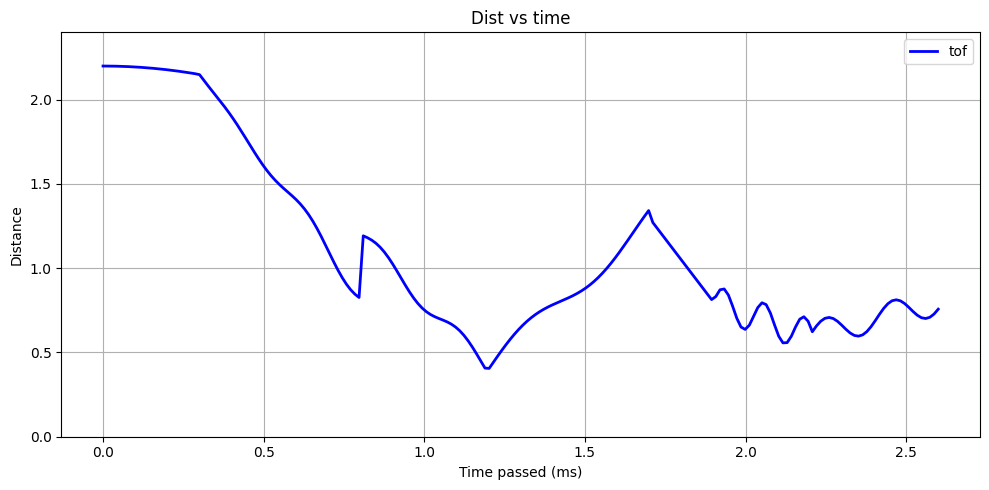

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Time interval: 0 to 2.6 ms
time = np.linspace(0, 2.6, 200)  # 200 points for smooth curve

# Initialize distance array
distance = np.zeros_like(time)

# Create the distance profile based on a new pattern
# Starting with distance ~2.2 units, ending at ~0.8 units
start_distance = 2.2
end_distance = 0.8

# Create the distance profile with two "mountains"
for i, t in enumerate(time):
    if t < 0.3:
        # Initial plateau with very slight, smooth decrease
        progress = t / 0.3
        distance[i] = start_distance - 0.05 * progress * progress  # More gradual, quadratic decrease
    elif t < 0.8:
        # Smoother descent
        progress = (t - 0.3) / 0.5
        # Reduced jaggedness at the beginning
        jaggedness = 0.07 * np.sin(progress * 12) * progress  # Progressive jaggedness
        distance[i] = (start_distance - 0.05) * (1 - 0.6 * progress) + jaggedness
    elif t < 1.2:
        # Slower descent to minimum
        progress = (t - 0.8) / 0.4
        distance[i] = 1.2 - 0.8 * progress + 0.05 * np.sin(progress * 10)
    elif t < 1.7:
        # First ascent (moving away)
        progress = (t - 1.2) / 0.5
        distance[i] = 0.4 + 0.9 * progress + 0.07 * np.sin(progress * 7)
    elif t < 1.9:
        # Second descent (flip maneuver)
        progress = (t - 1.7) / 0.2
        distance[i] = 1.3 - 0.5 * progress
    elif t < 2.2:
        # Second minimum and start of final movement
        progress = (t - 1.9) / 0.3
        distance[i] = 0.8 - 0.2 * progress + 0.1 * np.sin(progress * 15)
    else:
        # Final approach to end distance
        progress = (t - 2.2) / 0.4
        distance[i] = 0.6 + (end_distance - 0.6) * progress + 0.08 * np.sin(progress * 12)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(time, distance, 'b-', linewidth=2)
plt.xlabel('Time passed (ms)')
plt.ylabel('Distance')
plt.title('Dist vs time')
plt.ylim(0, start_distance + 0.2)  # Give some headroom above max distance
plt.grid(True)  # No grid to match example

# Add legend
plt.legend(['tof'], loc='upper right')

plt.tight_layout()
plt.savefig('tof_third_flip.png', dpi=300)
plt.show()

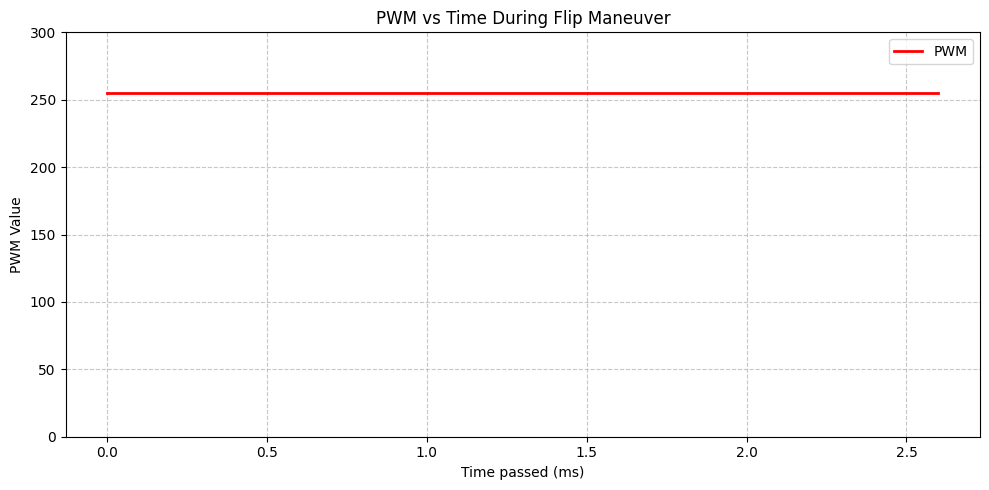

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Time interval: 0 to 2.6 ms (matching the third ToF sensor graph)
time = np.linspace(0, 2.6, 200)  # 200 points for smooth curve

# Create constant PWM value of 255
pwm = np.ones_like(time) * 255

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(time, pwm, 'r-', linewidth=2)
plt.xlabel('Time passed (ms)')
plt.ylabel('PWM Value')
plt.title('PWM vs Time During Flip Maneuver')
plt.ylim(0, 300)  # Give some headroom above PWM value
plt.grid(True, linestyle='--', alpha=0.7)

# Add legend
plt.legend(['PWM'], loc='upper right')

plt.tight_layout()
plt.savefig('pwm_third_flip.png', dpi=300)
plt.show()